In [1]:

import tensorflow
tensorflow.test.gpu_device_name()

2022-12-15 09:58:34.545163: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 09:58:34.613930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:34.848004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:34.848914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

'/device:GPU:0'

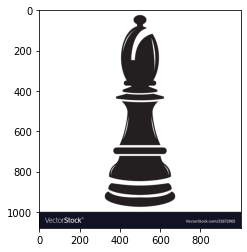

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('../input/datasetches2/DataSet-Chess/Entrenamiento/Bishop/00000001.jpg', 'r')


imshow(np.asarray(pil_im))

In [3]:

from tensorflow.keras import backend as K
from time import time

# DATA SOURCE --------------------------------------------------
train_data_dir = '../input/datasetches2/DataSet-Chess/Entrenamiento'
validation_data_dir = '../input/datasetches2/DataSet-Chess/Validacion'
test_data_dir = '../input/datasetches2/DataSet-Chess/Test'
image_size = (150, 150)
batch_size = 32

In [4]:
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    #validation_split=0.2,
    #subset="training",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 689 files belonging to 6 classes.


2022-12-15 09:58:39.017372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:39.018454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:39.019179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:39.020111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 09:58:39.020770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Found 499 files belonging to 6 classes.
Found 226 files belonging to 6 classes.


# **Image Augmentation**

In [5]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        rotation_range=15,
#        zoom_range=0.1
#)

#validation_datagen = ImageDataGenerator(
#        rescale=1./255
#)


#train_ds_augmentation = train_datagen.flow_from_directory(
#    train_data_dir,
#    #validation_split=0.2,
#    #subset="training",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)

#validation_ds_augmentation = validation_datagen.flow_from_directory(
#    validation_data_dir,
#    #validation_split=0.2,
#    #subset="validation",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)



# **The Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling                    

# MODEL --------------------------------------------------

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(150, 150, 3)))

#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [7]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [8]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

epochs = 300

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)


Epoch 1/300


2022-12-15 09:58:40.636518: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
2022-12-15 09:58:42.676256: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


22/22 [==============================] - 11s 102ms/step - loss: 1.8284 - accuracy: 0.2134 - val_loss: 1.7866 - val_accuracy: 0.1804
Epoch 2/300
 6/22 [=======>......................] - ETA: 1s - loss: 1.7874 - accuracy: 0.1927

Cleanup called...


22/22 [==============================] - 2s 91ms/step - loss: 1.7835 - accuracy: 0.2061 - val_loss: 1.7826 - val_accuracy: 0.2485
Epoch 3/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.7918 - accuracy: 0.1830

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 1.7886 - accuracy: 0.1800 - val_loss: 1.7814 - val_accuracy: 0.2244
Epoch 4/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.7849 - accuracy: 0.1741

Cleanup called...


22/22 [==============================] - 2s 66ms/step - loss: 1.7836 - accuracy: 0.1945 - val_loss: 1.7699 - val_accuracy: 0.2224
Epoch 5/300
 6/22 [=======>......................] - ETA: 0s - loss: 1.7771 - accuracy: 0.2240

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 1.7668 - accuracy: 0.2250 - val_loss: 1.7422 - val_accuracy: 0.2224
Epoch 6/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.7642 - accuracy: 0.2545

Cleanup called...


22/22 [==============================] - 2s 66ms/step - loss: 1.7463 - accuracy: 0.2642 - val_loss: 1.7352 - val_accuracy: 0.2585
Epoch 7/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.7138 - accuracy: 0.2589

Cleanup called...


22/22 [==============================] - 2s 91ms/step - loss: 1.7158 - accuracy: 0.2525 - val_loss: 1.6471 - val_accuracy: 0.3487
Epoch 8/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.6648 - accuracy: 0.2991

Cleanup called...


22/22 [==============================] - 2s 62ms/step - loss: 1.6473 - accuracy: 0.3135 - val_loss: 1.5426 - val_accuracy: 0.4048
Epoch 9/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.5815 - accuracy: 0.3482

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 1.5392 - accuracy: 0.3657 - val_loss: 1.3826 - val_accuracy: 0.4830
Epoch 10/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.5804 - accuracy: 0.3527

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 1.4957 - accuracy: 0.3919 - val_loss: 1.3442 - val_accuracy: 0.5050
Epoch 11/300
 6/22 [=======>......................] - ETA: 0s - loss: 1.4514 - accuracy: 0.4375

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 1.3994 - accuracy: 0.4485 - val_loss: 1.2635 - val_accuracy: 0.5631
Epoch 12/300
 6/22 [=======>......................] - ETA: 0s - loss: 1.3597 - accuracy: 0.4271

Cleanup called...


22/22 [==============================] - 2s 66ms/step - loss: 1.3125 - accuracy: 0.4731 - val_loss: 1.1002 - val_accuracy: 0.5992
Epoch 13/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.3101 - accuracy: 0.4688

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 1.2692 - accuracy: 0.5152 - val_loss: 1.0718 - val_accuracy: 0.6172
Epoch 14/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.1735 - accuracy: 0.5357

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 1.1885 - accuracy: 0.5269 - val_loss: 0.9977 - val_accuracy: 0.6934
Epoch 15/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.1090 - accuracy: 0.6071

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 1.0999 - accuracy: 0.5646 - val_loss: 0.8672 - val_accuracy: 0.7275
Epoch 16/300
 7/22 [========>.....................] - ETA: 0s - loss: 1.0026 - accuracy: 0.6741

Cleanup called...


22/22 [==============================] - 2s 82ms/step - loss: 1.0148 - accuracy: 0.6502 - val_loss: 0.8160 - val_accuracy: 0.7295
Epoch 17/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.9513 - accuracy: 0.6652

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.9898 - accuracy: 0.6560 - val_loss: 0.7582 - val_accuracy: 0.7535
Epoch 18/300
 6/22 [=======>......................] - ETA: 1s - loss: 0.8938 - accuracy: 0.6615

Cleanup called...


22/22 [==============================] - 2s 75ms/step - loss: 0.8737 - accuracy: 0.6821 - val_loss: 0.6521 - val_accuracy: 0.8056
Epoch 19/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.8086 - accuracy: 0.6830

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.8046 - accuracy: 0.6952 - val_loss: 0.6301 - val_accuracy: 0.7856
Epoch 20/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.8046 - accuracy: 0.6830

Cleanup called...


22/22 [==============================] - 2s 68ms/step - loss: 0.7555 - accuracy: 0.7083 - val_loss: 0.5199 - val_accuracy: 0.8377
Epoch 21/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.7397 - accuracy: 0.7321

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 0.6937 - accuracy: 0.7431 - val_loss: 0.4458 - val_accuracy: 0.8798
Epoch 22/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7857

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.5871 - accuracy: 0.7808 - val_loss: 0.4310 - val_accuracy: 0.8737
Epoch 23/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.6327 - accuracy: 0.7589

Cleanup called...


22/22 [==============================] - 2s 69ms/step - loss: 0.6189 - accuracy: 0.7794 - val_loss: 0.3947 - val_accuracy: 0.8818
Epoch 24/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.6055 - accuracy: 0.7589

Cleanup called...


22/22 [==============================] - 2s 67ms/step - loss: 0.5744 - accuracy: 0.7910 - val_loss: 0.3522 - val_accuracy: 0.9078
Epoch 25/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8482

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.5131 - accuracy: 0.8128 - val_loss: 0.3246 - val_accuracy: 0.9018
Epoch 26/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.5093 - accuracy: 0.8170

Cleanup called...


22/22 [==============================] - 2s 66ms/step - loss: 0.4767 - accuracy: 0.8273 - val_loss: 0.3141 - val_accuracy: 0.9038
Epoch 27/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.3789 - accuracy: 0.8542

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.4517 - accuracy: 0.8549 - val_loss: 0.2762 - val_accuracy: 0.9178
Epoch 28/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.4641 - accuracy: 0.8125

Cleanup called...


22/22 [==============================] - 2s 67ms/step - loss: 0.3732 - accuracy: 0.8607 - val_loss: 0.2486 - val_accuracy: 0.9419
Epoch 29/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.4933 - accuracy: 0.8348

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.3911 - accuracy: 0.8810 - val_loss: 0.2388 - val_accuracy: 0.9319
Epoch 30/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.3683 - accuracy: 0.8661

Cleanup called...


22/22 [==============================] - 2s 62ms/step - loss: 0.3908 - accuracy: 0.8621 - val_loss: 0.2385 - val_accuracy: 0.9439
Epoch 31/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8854

Cleanup called...


22/22 [==============================] - 2s 78ms/step - loss: 0.3658 - accuracy: 0.8737 - val_loss: 0.2521 - val_accuracy: 0.9299
Epoch 32/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8594

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 0.3217 - accuracy: 0.8897 - val_loss: 0.2360 - val_accuracy: 0.9319
Epoch 33/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.2895 - accuracy: 0.9062

Cleanup called...


22/22 [==============================] - 2s 74ms/step - loss: 0.2741 - accuracy: 0.9086 - val_loss: 0.1877 - val_accuracy: 0.9579
Epoch 34/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.2397 - accuracy: 0.9107

Cleanup called...


22/22 [==============================] - 2s 66ms/step - loss: 0.2567 - accuracy: 0.8999 - val_loss: 0.1865 - val_accuracy: 0.9539
Epoch 35/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.2483 - accuracy: 0.9018

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.2390 - accuracy: 0.9202 - val_loss: 0.1647 - val_accuracy: 0.9639
Epoch 36/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1404 - accuracy: 0.9420

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.1670 - accuracy: 0.9434 - val_loss: 0.1700 - val_accuracy: 0.9579
Epoch 37/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.3171 - accuracy: 0.9107

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.3053 - accuracy: 0.9086 - val_loss: 0.2038 - val_accuracy: 0.9639
Epoch 38/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1928 - accuracy: 0.9286

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.1958 - accuracy: 0.9361 - val_loss: 0.1930 - val_accuracy: 0.9659
Epoch 39/300
 5/22 [=====>........................] - ETA: 1s - loss: 0.2172 - accuracy: 0.9250

Cleanup called...


22/22 [==============================] - 2s 79ms/step - loss: 0.2114 - accuracy: 0.9332 - val_loss: 0.1832 - val_accuracy: 0.9579
Epoch 40/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.2242 - accuracy: 0.9330

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 0.2001 - accuracy: 0.9274 - val_loss: 0.1776 - val_accuracy: 0.9579
Epoch 41/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.1248 - accuracy: 0.9583

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.1104 - accuracy: 0.9652 - val_loss: 0.1907 - val_accuracy: 0.9579
Epoch 42/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.1039 - accuracy: 0.9688

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.1482 - accuracy: 0.9623 - val_loss: 0.1973 - val_accuracy: 0.9679
Epoch 43/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9427

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.1855 - accuracy: 0.9405 - val_loss: 0.1841 - val_accuracy: 0.9639
Epoch 44/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.0993 - accuracy: 0.9643

Cleanup called...


22/22 [==============================] - 2s 71ms/step - loss: 0.1435 - accuracy: 0.9594 - val_loss: 0.2021 - val_accuracy: 0.9719
Epoch 45/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.1315 - accuracy: 0.9583

Cleanup called...


22/22 [==============================] - 2s 61ms/step - loss: 0.1866 - accuracy: 0.9478 - val_loss: 0.1570 - val_accuracy: 0.9619
Epoch 46/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1602 - accuracy: 0.9554

Cleanup called...


22/22 [==============================] - 2s 79ms/step - loss: 0.1871 - accuracy: 0.9405 - val_loss: 0.1723 - val_accuracy: 0.9659
Epoch 47/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9219

Cleanup called...


22/22 [==============================] - 2s 61ms/step - loss: 0.2417 - accuracy: 0.9260 - val_loss: 0.2117 - val_accuracy: 0.9519
Epoch 48/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.2470 - accuracy: 0.9479

Cleanup called...


22/22 [==============================] - 2s 63ms/step - loss: 0.1727 - accuracy: 0.9478 - val_loss: 0.1920 - val_accuracy: 0.9659
Epoch 49/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9375

Cleanup called...


22/22 [==============================] - 2s 76ms/step - loss: 0.1320 - accuracy: 0.9521 - val_loss: 0.1914 - val_accuracy: 0.9659
Epoch 50/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1407 - accuracy: 0.9554

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 0.1392 - accuracy: 0.9579 - val_loss: 0.1935 - val_accuracy: 0.9659
Epoch 51/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1394 - accuracy: 0.9688

Cleanup called...


22/22 [==============================] - 2s 65ms/step - loss: 0.1288 - accuracy: 0.9652 - val_loss: 0.1887 - val_accuracy: 0.9679
Epoch 52/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1418 - accuracy: 0.9598

Cleanup called...


22/22 [==============================] - 2s 68ms/step - loss: 0.2182 - accuracy: 0.9361 - val_loss: 0.1877 - val_accuracy: 0.9659
Epoch 53/300
 6/22 [=======>......................] - ETA: 0s - loss: 0.0836 - accuracy: 0.9635

Cleanup called...


22/22 [==============================] - 2s 64ms/step - loss: 0.0991 - accuracy: 0.9681 - val_loss: 0.1677 - val_accuracy: 0.9699
Epoch 54/300
 7/22 [========>.....................] - ETA: 0s - loss: 0.1083 - accuracy: 0.9732

Cleanup called...


22/22 [==============================] - 2s 67ms/step - loss: 0.0898 - accuracy: 0.9768 - val_loss: 0.1651 - val_accuracy: 0.9679
Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping


In [9]:
# SAVING --------------------------------------------------

model.save("mimodelo.h5")

#  **Evaluación de resultados**

              precision    recall  f1-score   support

           0     1.0000    0.9753    0.9875        81
           1     0.9677    0.9091    0.9375        66
           2     0.9792    0.9792    0.9792        96
           3     0.9359    0.9605    0.9481        76
           4     0.9674    0.9889    0.9780        90
           5     0.9783    1.0000    0.9890        90

    accuracy                         0.9719       499
   macro avg     0.9714    0.9688    0.9699       499
weighted avg     0.9722    0.9719    0.9718       499



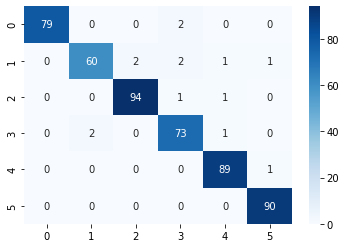

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

#disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#disp.plot()

print(classification_report(labels, predictions, digits = 4))

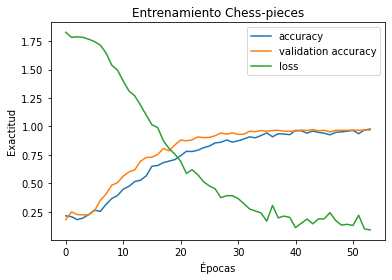

In [11]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')

plt.title('Entrenamiento Chess-pieces')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

(150, 150, 3)
El vector de salida obtenido:  [[0.06823153 0.13291381 0.14408429 0.50173914 0.03149406 0.12153715]]
La etiqueta de salida predicha es  3
Ahora dicho con texto: La etiqueta de salida predicha es  Pawn


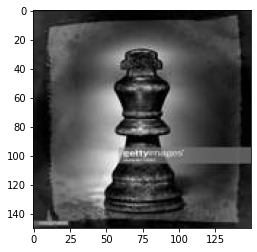

In [12]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
%matplotlib inline
pil_im = Image.open('../input/datasetches2/DataSet-Chess/Test/King/00000003.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3

im = im.reshape(1,150,150,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])






In [13]:
# PRODUCTION ----------------------------------------------

#from matplotlib.pyplot import imshow
import numpy as np
#from PIL import Image
import tensorflow.keras

# SAVING --------------------------------------------------
#model.save_model("mimodelo.h5")


# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
%matplotlib inline
print("ETIQUETA PREDICHA -> ETIQUETA REAL")
for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote,3), etiqueta_real_minilote):
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")

ETIQUETA PREDICHA -> ETIQUETA REAL
Knight -> Knight
Rook -> Rook
Knight -> Knight
Bishop -> Bishop
Bishop -> Bishop
Rook -> Rook
Pawn -> Pawn
Rook -> Rook
King -> King
Knight -> Knight
Rook -> Rook
Rook -> Rook
King -> King
Knight -> Knight
Rook -> Rook
Bishop -> Bishop
Knight -> Knight
Queen -> Queen
Queen -> Queen
Rook -> Rook
Bishop -> Bishop
Rook -> Rook
Pawn -> Pawn
Pawn -> Pawn
Rook -> Rook
Knight -> Knight
Bishop -> Bishop
King -> King
Rook -> Rook
Queen -> Queen
Pawn -> Pawn
Queen -> Queen
Queen -> Queen
Knight -> Knight
Knight -> Knight
King -> King
Knight -> Knight
Bishop -> Bishop
Queen -> Queen
King -> King
Queen -> Queen
Knight -> Knight
Bishop -> Bishop
Pawn -> Pawn
Rook -> Rook
Knight -> Knight
Rook -> Rook
Knight -> Knight
Pawn -> Pawn
Bishop -> Bishop
Rook -> Rook
Queen -> Queen
Queen -> Knight ✘
Rook -> Rook
Queen -> Queen
Rook -> Rook
Rook -> Rook
Pawn -> King ✘
Knight -> Knight
Queen -> Queen
Queen -> Queen
King -> King
Knight -> Knight
Queen -> Queen
Knight -> Knig